In [1]:
# SETUP CODE
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

<h2>Introduction</h2>

Bank managers have been asking the same question for a long time. What sort of clients will subscribe to a term deposit? To solve this question, we have downloaded the “bank-additional-full.csv” spreadsheet from the Portuguese banking institution to analyze the results and conduct the research. By using the KNN classification method, we aim to predict if the client will subscribe to a term deposit or not.

"Bank-additional-full.csv” is a document representing the marketing efforts of the Portuguese banking institution. 21 variables are measured, with the classification variable being whether or not a client will subscribe to a term deposit. A term deposit is a fixed-term investment that contains the deposit of funds into an account at a financial institution and receives a certain amount of interest on the maturity date. This data was originally produced by researchers at the University Institute of Lisbon for a report highlighting a data-driven approach to predict the successfulness of bank telemarketing.

This dataset features 20 attributes regarding demographics (age, job, marital status), economic and educational situation (level of education, possession of a housing loan), and historical information’s relationship to the banking institution (last month of contact, outcome from previous marketing campaign). In order to make this prediction more effective and accurate, we have selected the 7 most important predictors to conduct KNN classification analysis, and each of the target variables contains 41188 observations, which makes the whole prediction more trustworthy and accurate. We will separate 75% of the data into the training set and 25% of the remaining into the testing set in order to find out the most suitable k-neighbour in our function. After identifying the correct "k" for the function, we will use "ggpairs" to create a visual comparison to demonstrate the correlation between each variable measured, and at last, come up with an accurate and effective prediction.

Our project will be able to answer the question; given a new client (a new row in the table), will the client subscribe to a term deposit or not? (335 Words)

<h2>Methods & Results</h2>

To predict will the client subscribe to a term deposit or not, we first download the dataset from the University Institue of Lisbon. However, the 20 predictors in the original dataset are too complex for the program. It will cause the KNN classification progress to become very slow and unreliable. In addition, KNN classification does not work well with a large number of predictors. Hence, after conducting thorough researches on each categorical variable, we decide to filter out and select the seven most important variables (Age, Job, Marital Status, Education, Housing, Loan, Campaign) that impacts the results most. We filter out the valid data in the spreadsheet and come out with 41188 observations. We scale the data to make sure the dataset has been standardized. Due to the large sample size, we believe it is reasonable and logical to spilt 75% of the dataset into the training set and 25% into the testing set. We also reassure that the issue of class imbalance does not exist in this stage to prevent any upsampling and downsampling issues.

Afterwards, we conduct a cross-validation analysis by creating nearest_neighbors model specification, with neighbours equals to tune(). Then, we add a recipe and model specification to the workflow function, and use the tune_grid function on the train/validation splits to estimate the classifier accuracy for a range of K values. At last, we will conclude the results in a visual presentation (graph) for easier observation.

After picking the optimum K parameter from the graph, we can proceed to the KNN classification prediction step. We create a new model specification for the best parameter value and retrain the classifier using the fit function. At last, we evaluate the estimated accuracy of the classifier on the test set using the predict function. For better comparison, we will use the ggpairs function to generate a matrix of plots, showing all the graphs and correlation coefficients of the variables in our analyses. At last, we can conclude the accuracy of our KNN classification model and predict how many bank clients subscribe to term deposits or not, also identifying which of the variables have the highest correlation with the outcome. (365 Words)

The coding part is as follows:

In [2]:
# Retrieving and preparing the dataset for classification

# Set the seed
set.seed(7134) 

# Read the dataset and discard the unnecessary columns
temp <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip",temp)
bank_data <- read.table(unz(temp, "bank-additional/bank-additional-full.csv"), sep=";", header=TRUE) %>%
    select(age, duration, campaign, previous, y)
unlink(temp)
bank_data <- as_tibble(bank_data) %>%
    mutate(y = as_factor(y),
           age = as.double(unclass(as_factor(age))),
           duration = as.double(unclass(as_factor(duration))),
           campaign = as.double(unclass(as_factor(campaign))),
           previous = as.double(unclass(as_factor(previous))))
bank_data

age duration campaign previous y  
1     40  262      1        1        no 
2     41  150      1        1        no 
3     21  227      1        1        no 
4     24  152      1        1        no 
5     40  308      1        1        no 
⋮     ⋮   ⋮        ⋮        ⋮        ⋮  
41184 57  335      1        1        yes
41185 30  384      1        1        no 
41186 40  190      2        1        no 
41187 28  443      1        1        yes
41188 58  240      3        2        no

In [3]:
# Set the seed
set.seed(7134) 

# Filter out rows with unknown data
bank_data_filtered <- bank_data %>%
    filter(duration != 0)
             
bank_data_filtered

age duration campaign previous y  
1     40  262      1        1        no 
2     41  150      1        1        no 
3     21  227      1        1        no 
4     24  152      1        1        no 
5     40  308      1        1        no 
⋮     ⋮   ⋮        ⋮        ⋮        ⋮  
41184 57  335      1        1        yes
41185 30  384      1        1        no 
41186 40  190      2        1        no 
41187 28  443      1        1        yes
41188 58  240      3        2        no

In [4]:
# Find the number of occurrences of each value of y to determine if there is a class imbalance
total_rows <- nrow(bank_data_filtered)
y_occurrence <- bank_data_filtered %>%
    group_by(y) %>%
    summarize(n = n(), n_percent = n()/total_rows)
y_occurrence

# We can see that there are many more occurrences of "no" compared to "yes", so we need to upsample "yes" in our training data later on

`summarise()` ungrouping output (override with `.groups` argument)



y   n     n_percent
1 no  36548 0.8873458
2 yes  4640 0.1126542

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`summarise()` ungrouping output (override with `.groups` argument)



y   age         duration   campaign    previous   
1 no  -0.01081003 -0.1496087  0.02370571 -0.08201464
2 yes  0.08514762  1.1784266 -0.18672337  0.64600670

name     1           2           diff      
1 duration -0.14960872  1.17842658 1.32803529
2 previous -0.08201464  0.64600670 0.72802134
3 campaign  0.02370571 -0.18672337 0.21042908
4 age      -0.01081003  0.08514762 0.09595765

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



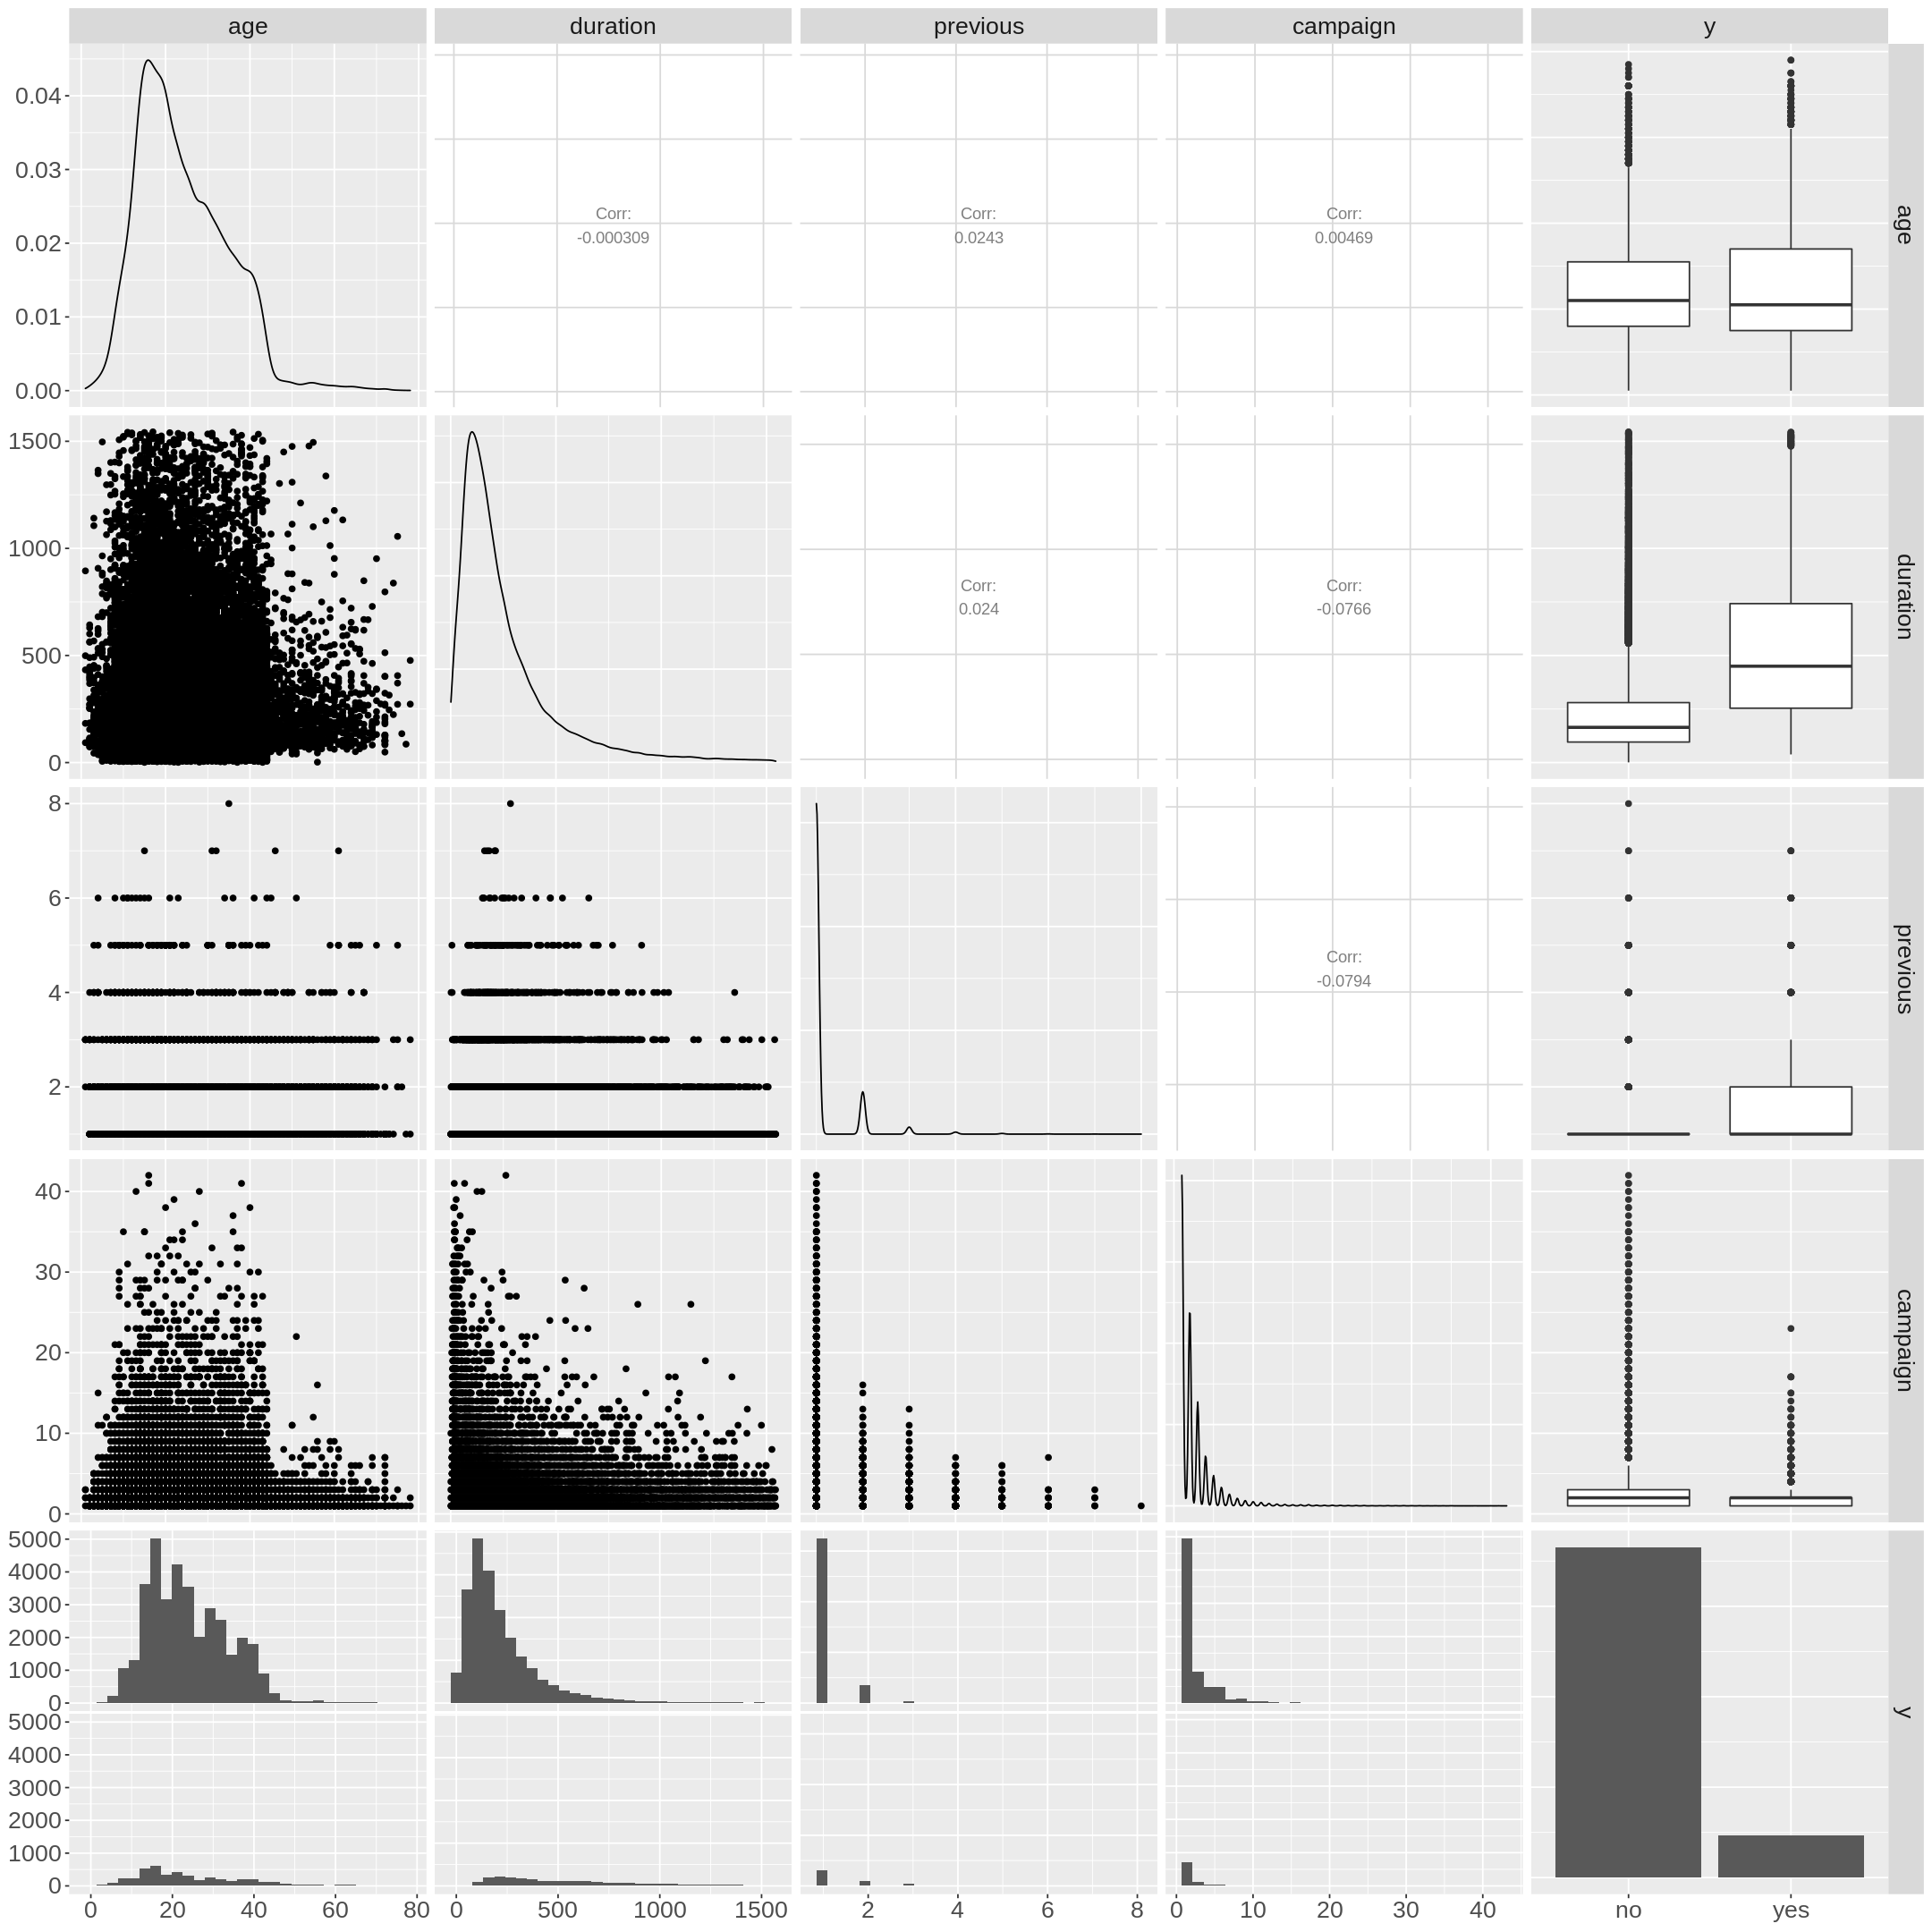

In [5]:
library(GGally)
options(repr.plot.width=18, repr.plot.height=18)

bank_scaled_data <- recipe(y ~ ., data = bank_data_filtered) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep() %>%
    bake(bank_data_filtered)

predictor_means <- bank_scaled_data %>%
    group_by(y) %>%
    summarize(across(age:previous, mean))
predictor_means

predictor_means %>%
    select(age:previous) %>%
   tibble::rownames_to_column() %>%  
   pivot_longer(-rowname) %>% 
   pivot_wider(names_from=rowname, values_from=value) %>%
    mutate(diff=abs(`1` - `2`)) %>%
    arrange(desc(diff))

plot_pairs <- bank_data_filtered %>%
  select(age, duration, previous, campaign, y,)%>%
  ggpairs +
  theme(text = element_text(size = 20))
plot_pairs

From the plots above, it's a bit difficult to determine which predictors should be chosen, but we can see that 'duration' and 'previous' both have significantly different distributions for each value of y. This suggests that they would be good predictors for y. We also grouped each of the predictors based on the value of y, calculated their means, and found the difference between the groups' means for each predictor. The larger this difference, the better of the predictor, as it suggests that there is some correlation between y and the predictor. From these calculated values, we can see that duration and campaign have the largest differences and thus would be good predictors, which supports our findings from observing the plots above. We can also see that the other two predictors, campaign and age, have very small differences, and so we will not use these predictors as they likely would not contribute much to the model's accuracy and would only increase the amount of computation needed.

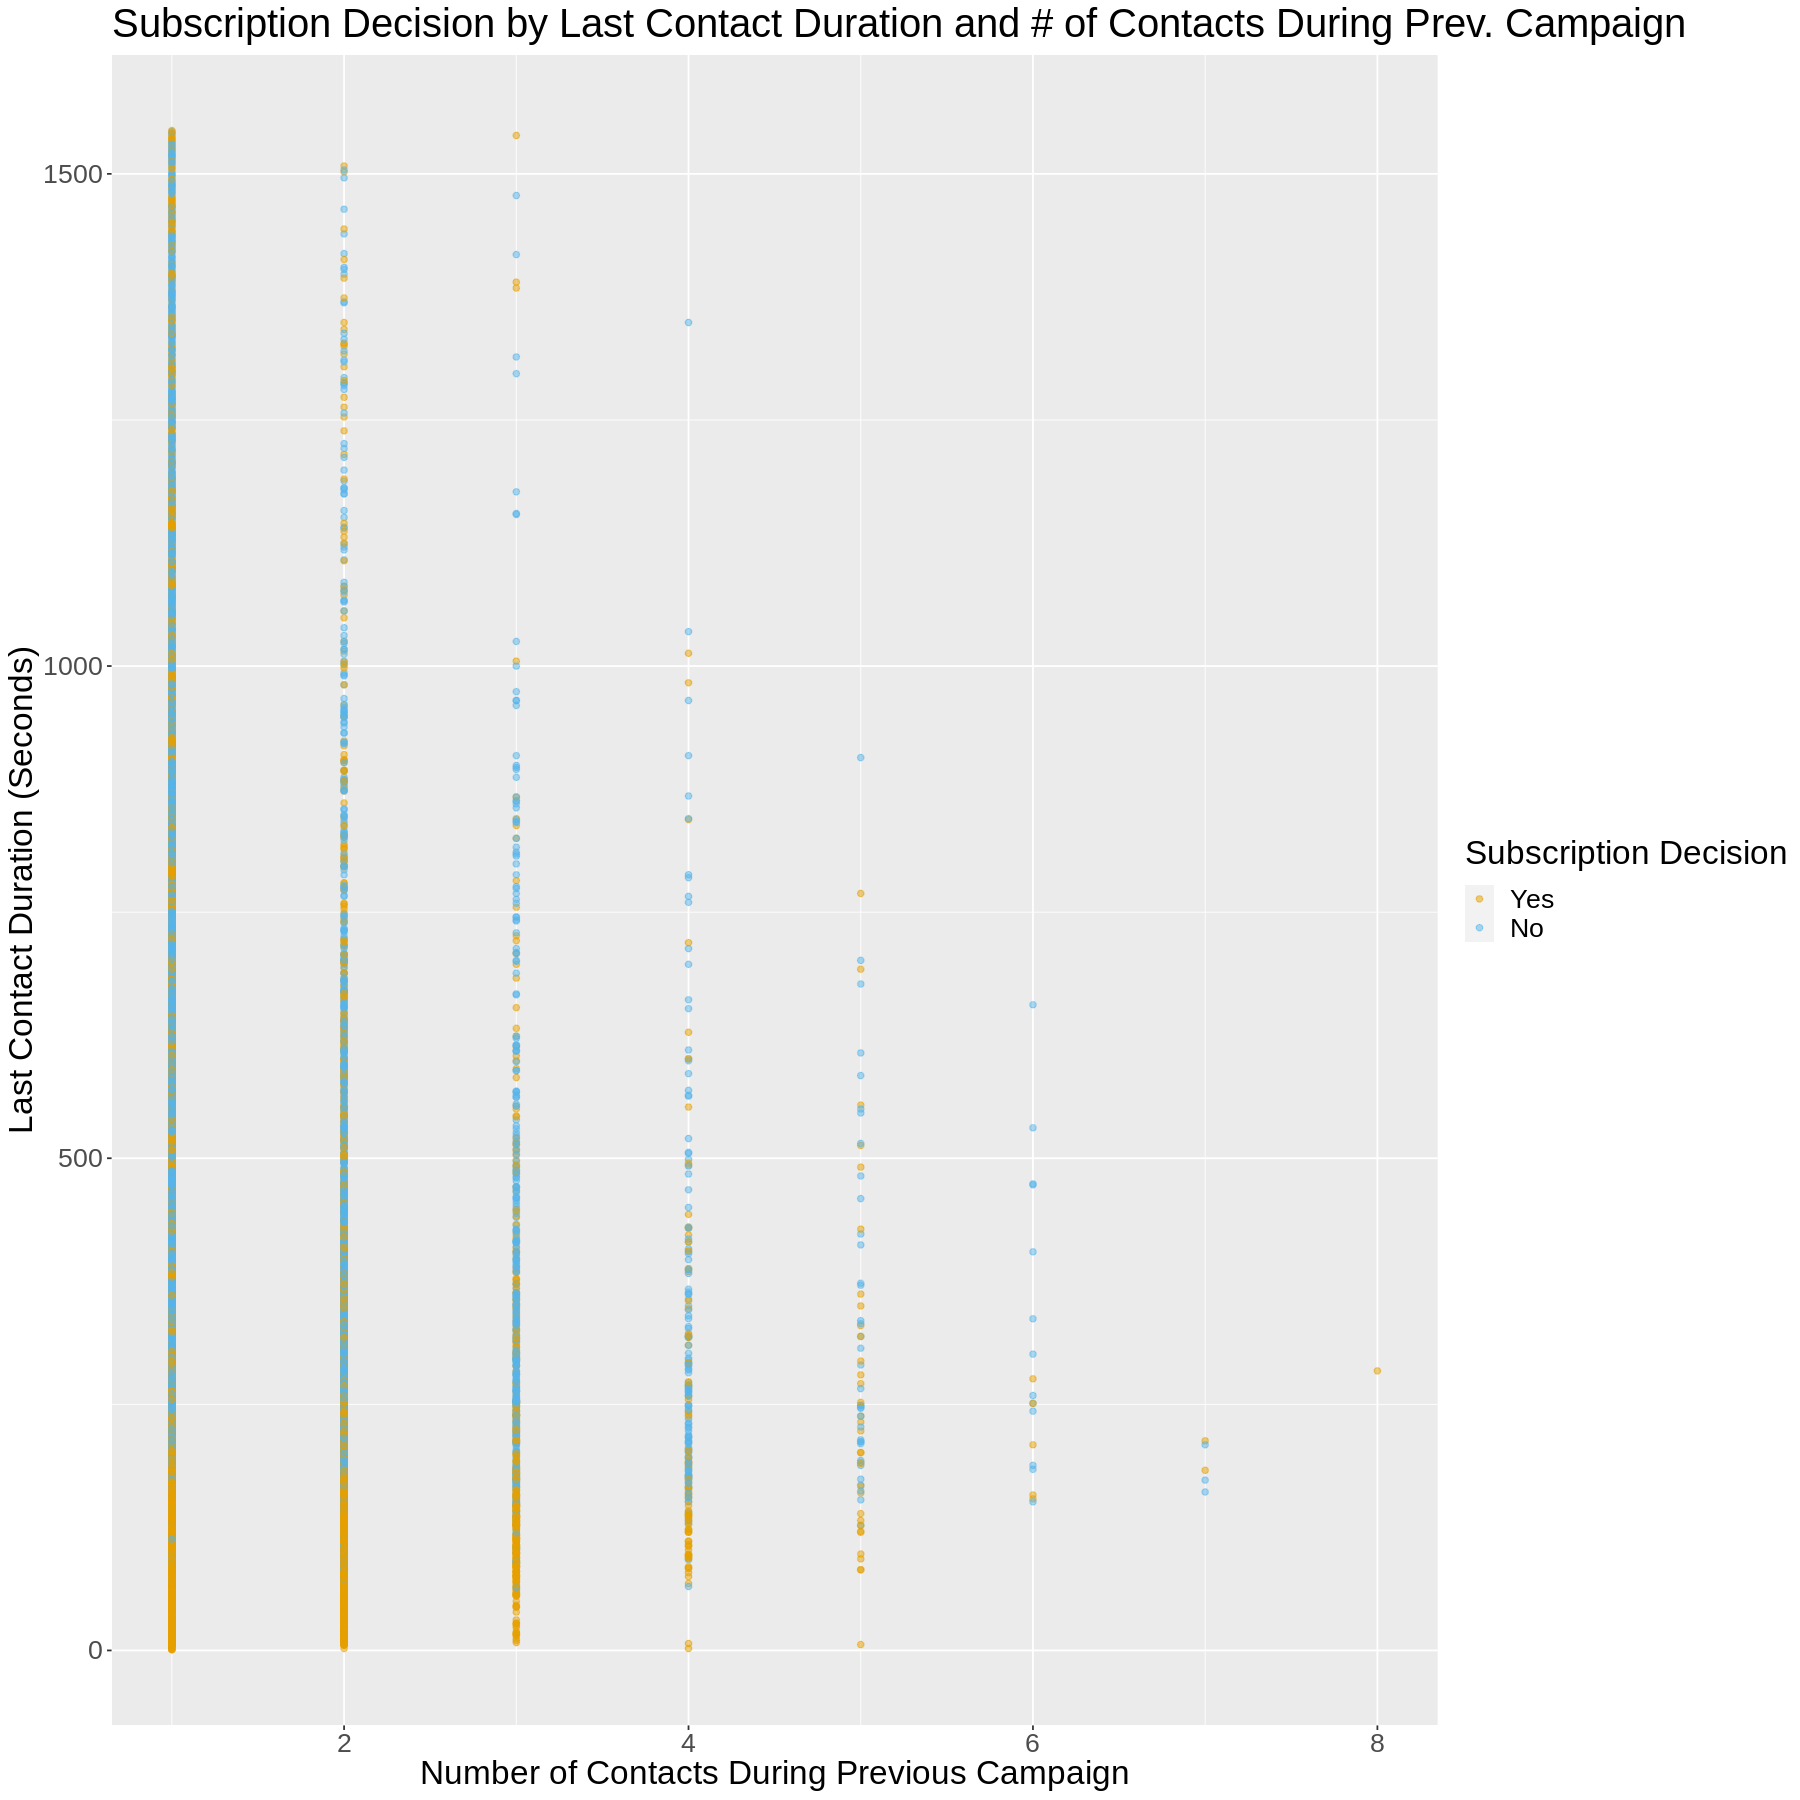

In [6]:
bank_data_filtered <- select(bank_data_filtered, duration, previous, y)

options(repr.plot.width=15, repr.plot.height=15)
cbPalette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999")

bank_plot <- bank_data_filtered %>%
  ggplot(aes(x = previous, y = duration, color = y)) +
  geom_point(alpha = 0.5) +
  labs(color = "Subscription Decision", x = "Number of Contacts During Previous Campaign", y = "Last Contact Duration (Seconds)") +
  scale_color_manual(labels = c("Yes", "No"), values = cbPalette) +
  theme(text = element_text(size = 20)) +
    ggtitle("Subscription Decision by Last Contact Duration and # of Contacts During Prev. Campaign")
bank_plot

From the above plot, we can see that although there are some "yes" and "no" points mixed together in the graph, overall it seems like the "yes" points are focused in the bottom left area, while the "no" points are in the top right. This suggests that our predictors will be fairly useful in predicting the subcription decision.

In [7]:
# Set the seed
set.seed(7134) 

# Split the dataset into training and testing sets
bank_split <- initial_split(bank_data_filtered, prop = 0.75, strata = y)  
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)
bank_test
bank_train

bank_upscaled_train <- recipe(y ~ duration+previous, data = bank_train) %>%
    step_upsample(y, over_ratio=1, skip = FALSE) %>%
    prep() %>%
    bake(bank_train)

total_rows <- nrow(bank_upscaled_train)
validate_balance <- bank_upscaled_train %>%
    group_by(y) %>%
    summarize(n = n(), n_percent = n()/total_rows)
validate_balance


duration previous y  
1     150      1        no 
2     218      1        no 
3     354      1        no 
4      39      1        no 
5     173      1        no 
⋮     ⋮        ⋮        ⋮  
10293 404      1        yes
10294 155      1        no 
10295 330      3        yes
10296 361      1        no 
10297 113      2        no

duration previous y  
1     262      1        no 
2     227      1        no 
3     152      1        no 
4     308      1        no 
5     199      1        no 
⋮     ⋮        ⋮        ⋮  
30887 335      1        yes
30888 384      1        no 
30889 190      1        no 
30890 443      1        yes
30891 240      2        no

Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
`summarise()` ungrouping output (override with `.groups` argument)



y   n     n_percent
1 no  27411 0.5      
2 yes 27411 0.5

In [8]:
# Perform cross validation to determine the ideal # of neighbours

# Set the seed
set.seed(7134) 

# No need to use the entire dataset for this, 
# especially since cross validation would take too long on a datset so large
bank_sample <- rep_sample_n(bank_upscaled_train, 1000)

bank_k_recipe <- recipe(y ~ duration+previous, data = bank_sample) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

bank_vfold <- vfold_cv(bank_sample, v = 5, strata = y)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [9]:
# Set the seed
set.seed(7134) 
bank_knn_results <- workflow() %>%
       add_recipe(bank_k_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = bank_vfold, grid = 20) %>%
       collect_metrics()
bank_knn_results

neighbors .metric  .estimator mean      n std_err    .config
1  2         accuracy binary     0.7090419 5 0.01454217 Model01
2  2         roc_auc  binary     0.7695286 5 0.01192952 Model01
3  3         accuracy binary     0.7490024 5 0.01195885 Model02
4  3         roc_auc  binary     0.7973912 5 0.01342836 Model02
5  4         accuracy binary     0.7440224 5 0.01050329 Model03
⋮  ⋮         ⋮        ⋮          ⋮         ⋮ ⋮          ⋮      
24 13        roc_auc  binary     0.8358941 5 0.01234401 Model12
25 14        accuracy binary     0.7640378 5 0.01202189 Model13
26 14        roc_auc  binary     0.8342405 5 0.01177111 Model13
27 15        accuracy binary     0.7610478 5 0.01238303 Model14
28 15        roc_auc  binary     0.8369416 5 0.01334105 Model14

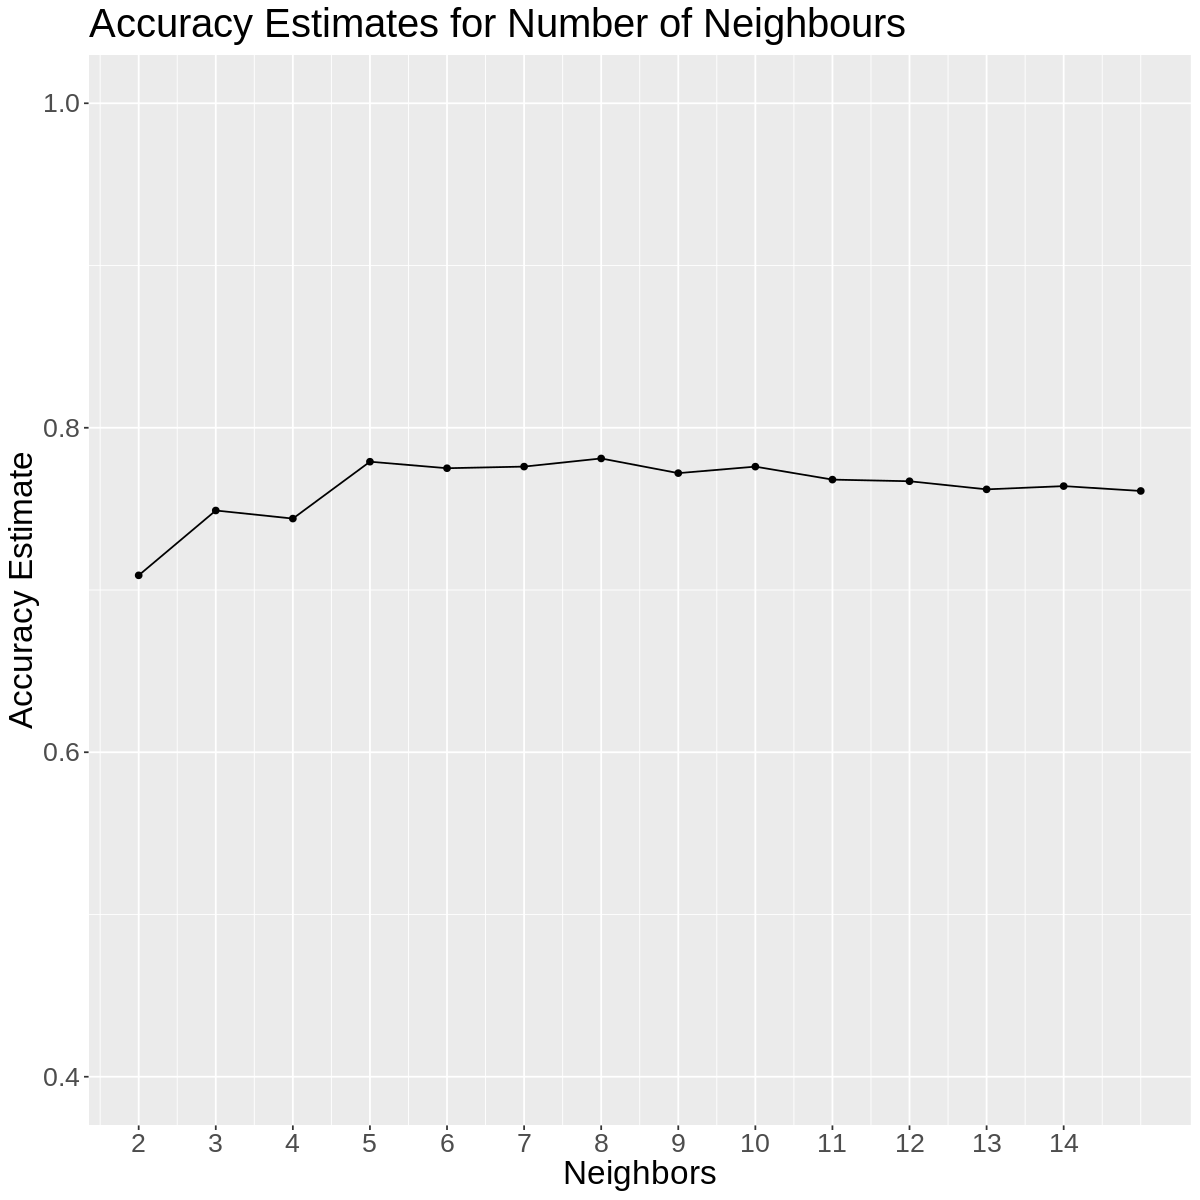

In [10]:
# Plot the accuracies of each k determined by cross validation
# to find the ideal value of k
options(repr.plot.width=10, repr.plot.height=10)

accuracies <- bank_knn_results %>% 
       filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       ggtitle("Accuracy Estimates for Number of Neighbours") +
       theme(text = element_text(size = 20)) +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

accuracy_versus_k


From the above plot, we can see that the accuracy increases as the number of neighbours increases, however, the increase in accuracy above 5 neighbours is fairly negligible, and even decreases sometimes. Therefore we will choose k=5, which provides relatively high accuracy with the minimum amount of computation needed.

In [11]:
bank_recipe <- recipe(y ~ duration+previous, data = bank_upscaled_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
bank_recipe

bank_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
       set_engine("kknn") %>%
       set_mode("classification")

bank_spec

bank_fit <- workflow() %>%
        add_recipe(bank_recipe) %>%
        add_model(bank_spec) %>%
        fit(data = bank_upscaled_train)
bank_fit

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~5, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2827879
Best kernel: rectangular
Best k: 5

In [12]:
bank_predictions <- predict(bank_fit , bank_test) %>%
       bind_cols(bank_test)
bank_predictions

bank_metrics <- bank_predictions %>%
         metrics(truth = y, estimate = .pred_class)
bank_metrics

bank_conf_mat <- bank_predictions %>% 
       conf_mat(truth = y, estimate = .pred_class)
bank_conf_mat

.pred_class duration previous y  
1     no          150      1        no 
2     no          218      1        no 
3     no          354      1        no 
4     no           39      1        no 
5     no          173      1        no 
⋮     ⋮           ⋮        ⋮        ⋮  
10293 no          404      1        yes
10294 no          155      1        no 
10295 yes         330      3        yes
10296 no          361      1        no 
10297 no          113      2        no

.metric  .estimator .estimate
1 accuracy binary     0.8871516
2 kap      binary     0.3610076

          Truth
Prediction   no  yes
       no  8711  736
       yes  426  424

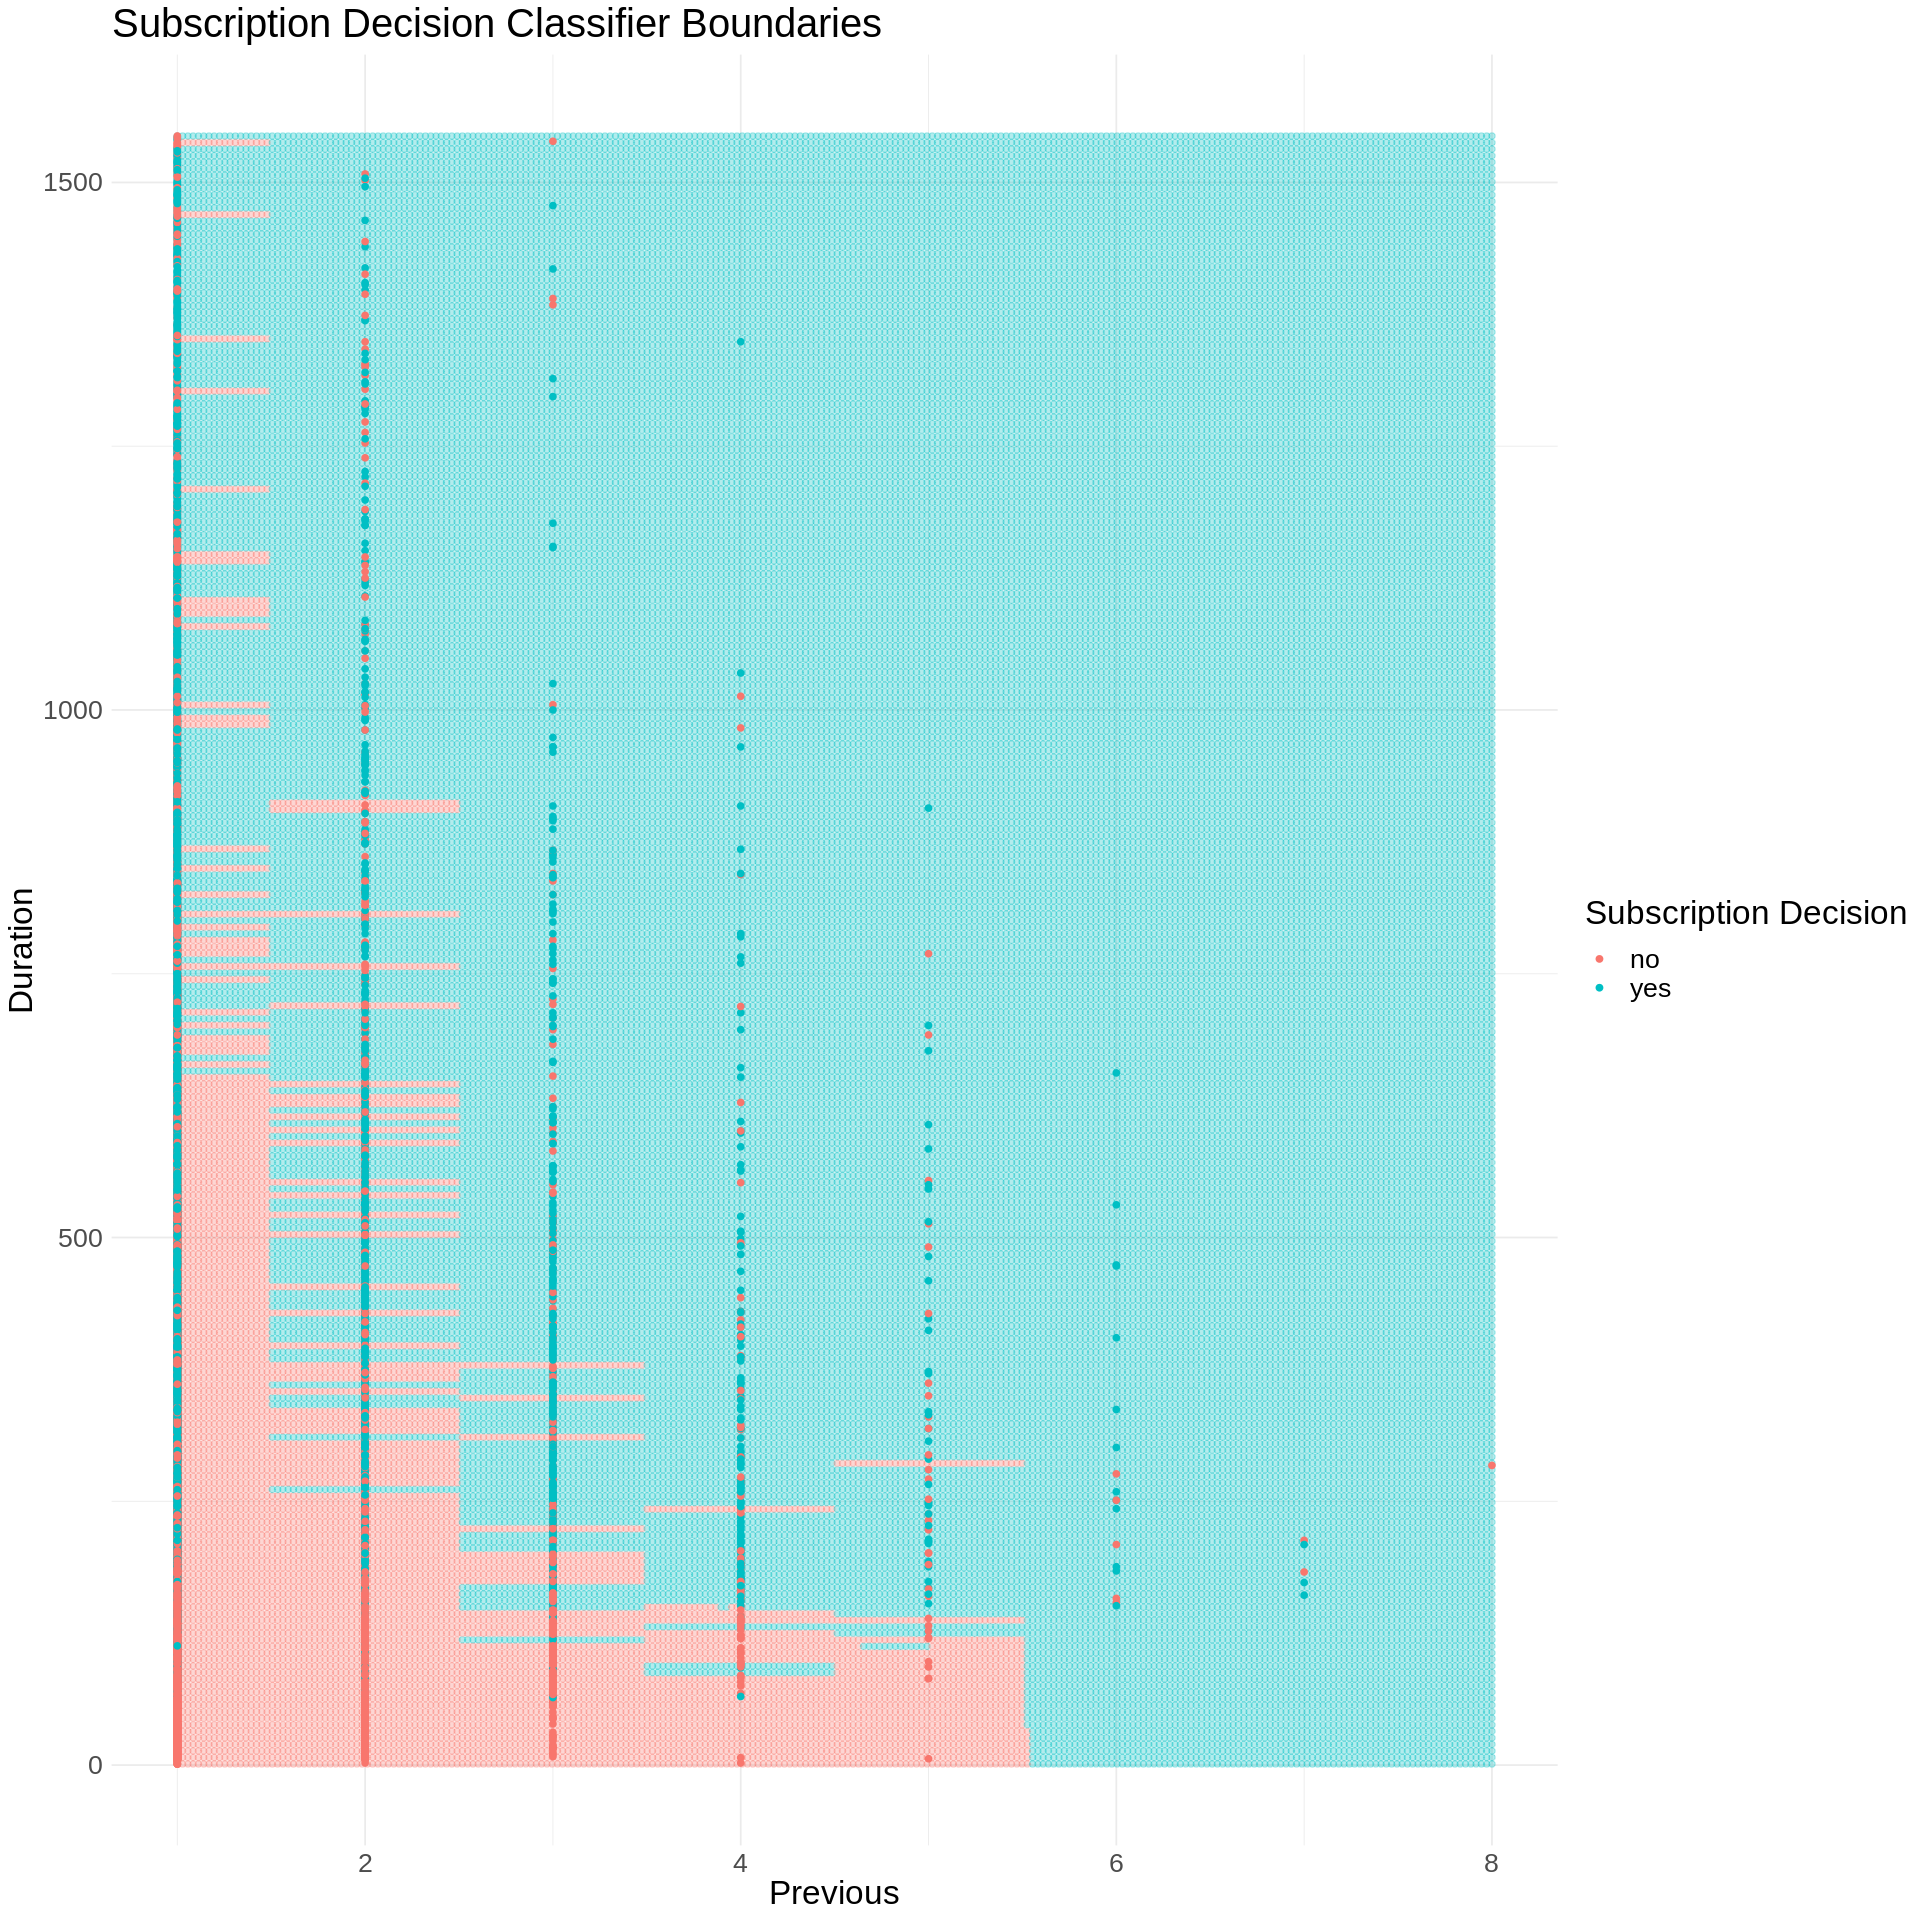

In [13]:
## Creates 2 sequances for each x and y axis. I have asked for 100 points in each sequance, you can change this as you like. 
## Keep in mind that higher the number of points, the areas will look smoother, but will take more time to run. 
## Find a balance that works for you.
previous_seq <- seq(from = min(bank_data_filtered$previous, na.rm = TRUE), 
             to = max(bank_data_filtered$previous, na.rm = TRUE), 
             length.out = 250)
duration_seq <- seq(from = min(bank_data_filtered$duration, na.rm = TRUE), 
             to = max(bank_data_filtered$duration, na.rm = TRUE), 
             length.out = 250)

## Creates a dataframe by considering each pair of values from the 2 sequences above.
## If you selected 1000 points for each of the above sequences, there will be 100*100 = 10,000 rows
## in the dataframe.
grid_points <- expand.grid(previous = previous_seq,
                           duration = duration_seq)

## Predicts the class for each of the 10,000 points in the grid.
grid_predicted <- bank_fit %>%
                    predict(new_data = grid_points) %>%
                    cbind(grid_points)

## Plot the decision boundaries.
## If you see dots instead of an area, you can try increasing the number of points in the sequences above.
## You can also play with the size argument in `geom_point()`.

options(repr.plot.width = 16, repr.plot.height = 16)

grid_predicted %>%
    ggplot(aes(x = previous, 
               y = duration, 
               color = .pred_class)) + 
    geom_point(alpha = 0.3) + 
    geom_point(data = bank_data_filtered,
               aes(x = previous, 
                   y = duration, 
                   color = y)) + 
    theme_minimal() + 
    labs(x = "Previous", 
         y = "Duration",
         colour = "Subscription Decision") +
    ggtitle("Subscription Decision Classifier Boundaries") +
    theme(text = element_text(size = 20))

In [14]:
previous_counts <- bank_data_filtered %>%
    group_by(previous, y) %>%
    summarize(n = n())
previous_counts

duration_counts = bank_data_filtered %>% 
     group_by(duration=cut(duration, breaks= seq(0, 1600, by = 100)) ) %>% 
     summarise(n= n()) %>%
     arrange(as.numeric(duration))
duration_counts

`summarise()` regrouping output by 'previous' (override with `.groups` argument)



previous y   n    
1  1        no  32422
2  1        yes  3141
3  2        no   3594
4  2        yes   967
5  3        no    404
⋮  ⋮        ⋮   ⋮    
11 6        no   5   
12 6        yes 13   
13 7        no   2   
14 7        yes  3   
15 8        no   1

`summarise()` ungrouping output (override with `.groups` argument)



duration          n    
1  (0,100]            9882
2  (100,200]         12770
3  (200,300]          7286
4  (300,400]          4051
5  (400,500]          2246
⋮  ⋮                 ⋮    
12 (1.1e+03,1.2e+03] 226  
13 (1.2e+03,1.3e+03] 162  
14 (1.3e+03,1.4e+03] 137  
15 (1.4e+03,1.5e+03] 112  
16 (1.5e+03,1.6e+03]  45

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6)


Looking at the above plot, it doesn't seem like the decision boundaries are very clear, especially since the datapoints are only split between 8 values of 'previous'. However, from the tables above, we can observe that the majority of the data points are in the bottom left of the graph, with values of previous from 1-2, and values of duration from 0-500. Furthermore, most of these data points are labelled "no". We can see that our observations from the tables do in fact match the plot above, where the smaller values of previous and duration correspond to "no", and larger values correspond to "yes".

On the other hand, one weakness that we can identify from these tables is that our data is fairly imbalanced, with most of the observations having smaller values of previous and duration, as well as being labelled "no". Although our classifier has high accuracy for our current data, it may not be as accurate for data with higher values of previous and duration since our model was trained without many of these data points available to it.

<h2>Discussion<h/2>

Summarize what you found Discuss whether this is what you expected to find? Discuss what impact could such findings have? Discuss what future questions could this lead to?